In [1]:
from numpy import sort
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold,SelectFromModel,variance_threshold

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score,f1_score ,accuracy_score

import joblib

import warnings 
warnings.filterwarnings('ignore')

ImportError: ignored

In [ ]:
pd.set_option('display.max_columns',100)

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,110049,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0
1,83668,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1
2,253898,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1
3,97905,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0
4,417495,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320000 entries, 0 to 319999
Data columns (total 23 columns):
row_id                            320000 non-null int64
loan_type                         320000 non-null int64
property_type                     320000 non-null int64
loan_purpose                      320000 non-null int64
occupancy                         320000 non-null int64
loan_amount                       320000 non-null float64
preapproval                       320000 non-null int64
msa_md                            320000 non-null int64
state_code                        320000 non-null int64
county_code                       320000 non-null int64
applicant_ethnicity               320000 non-null int64
applicant_race                    320000 non-null int64
applicant_sex                     320000 non-null int64
applicant_income                  294370 non-null float64
population                        305613 non-null float64
minority_population_pct           305612 no

In [ ]:
train.accepted.dtype

dtype('int64')

In [ ]:
categorical_cols = [c for c in train.columns if train[c].dtype=='int64']
categorical_cols

['row_id',
 'loan_type',
 'property_type',
 'loan_purpose',
 'occupancy',
 'preapproval',
 'msa_md',
 'state_code',
 'county_code',
 'applicant_ethnicity',
 'applicant_race',
 'applicant_sex',
 'lender',
 'accepted']

In [ ]:
for i in categorical_cols:
    train[i] = train[i].astype(int)

In [ ]:
categorical_cols = [c for c in train.columns if train[c].dtype=='int32']
categorical_cols

['row_id',
 'loan_type',
 'property_type',
 'loan_purpose',
 'occupancy',
 'preapproval',
 'msa_md',
 'state_code',
 'county_code',
 'applicant_ethnicity',
 'applicant_race',
 'applicant_sex',
 'lender',
 'accepted']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320000 entries, 0 to 319999
Data columns (total 23 columns):
row_id                            320000 non-null int32
loan_type                         320000 non-null int32
property_type                     320000 non-null int32
loan_purpose                      320000 non-null int32
occupancy                         320000 non-null int32
loan_amount                       320000 non-null float64
preapproval                       320000 non-null int32
msa_md                            320000 non-null int32
state_code                        320000 non-null int32
county_code                       320000 non-null int32
applicant_ethnicity               320000 non-null int32
applicant_race                    320000 non-null int32
applicant_sex                     320000 non-null int32
applicant_income                  294370 non-null float64
population                        305613 non-null float64
minority_population_pct           305612 no

In [ ]:
train.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,294370.000000,305613.000000,305612.000000,305631.000000,305577.000000,305541.000000,305570.000000,320000.000000,320000.000000
mean,249758.725134,1.365978,1.048028,2.066772,1.109556,221.751362,2.764656,181.403025,23.713650,144.615544,2.036659,4.786444,1.463888,102.270129,5419.888019,31.661573,69227.613449,91.821714,1427.923199,1886.733704,3716.677278,0.499894
std,144320.869414,0.690015,0.232358,0.948346,0.326053,610.682793,0.543192,138.520946,15.986035,100.281335,0.512510,1.026951,0.679147,151.612363,2734.952609,26.361653,14813.142089,14.225090,738.609685,913.764913,1838.351914,0.500001
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,0.538000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000
25%,124875.250000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,2.000000,5.000000,1.000000,47.000000,3748.000000,10.737000,59722.000000,88.065000,943.000000,1302.000000,2442.000000,0.000000
50%,249636.000000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,2.000000,5.000000,1.000000,74.000000,4976.000000,22.917000,67498.000000,100.000000,1328.000000,1754.000000,3699.000000,0.000000
75%,374803.500000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,2.000000,5.000000,2.000000,117.000000,6468.000000,46.128000,75328.000000,100.000000,1780.000000,2310.000000,5436.000000,1.000000
max,499998.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,4.000000,7.000000,4.000000,10139.000000,34176.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


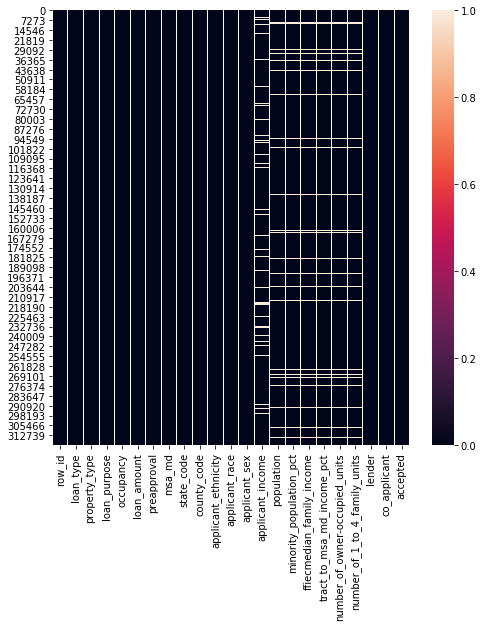

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

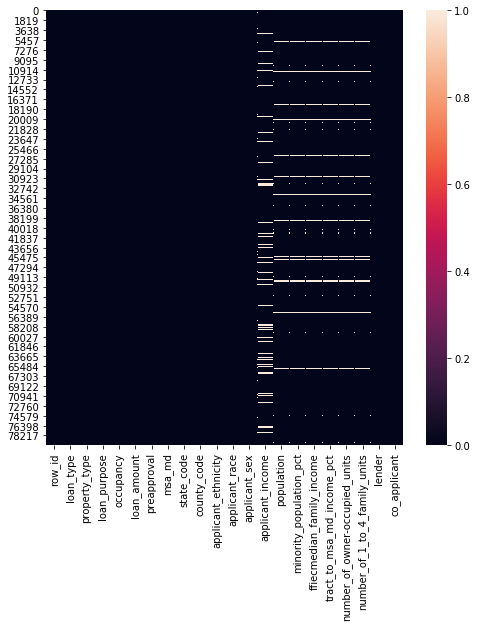

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(test.isnull())

## taking care of missing values in 
['applicant_income', 'population', 'minority_population_pct',
'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']

In [ ]:
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,110049,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0
1,83668,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1
2,253898,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1
3,97905,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0
4,417495,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1


In [ ]:
train.isnull().mean()

row_id                            0.000000
loan_type                         0.000000
property_type                     0.000000
loan_purpose                      0.000000
occupancy                         0.000000
loan_amount                       0.000000
preapproval                       0.000000
msa_md                            0.000000
state_code                        0.000000
county_code                       0.000000
applicant_ethnicity               0.000000
applicant_race                    0.000000
applicant_sex                     0.000000
applicant_income                  0.080094
population                        0.044959
minority_population_pct           0.044963
ffiecmedian_family_income         0.044903
tract_to_msa_md_income_pct        0.045072
number_of_owner-occupied_units    0.045184
number_of_1_to_4_family_units     0.045094
lender                            0.000000
co_applicant                      0.000000
accepted                          0.000000
dtype: floa

## 1.0 dealing with the missing data in applicant_income

In [ ]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')

In [ ]:
train_applicant_income = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income']]
train_applicant_income.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income
0,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0
1,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0
2,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0
3,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0
4,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_applicant_income, train.accepted, test_size=0.33, random_state=42)

In [ ]:
def impute_na(df,variable,mean,median): 
    df[variable+'_mean'] = df[variable].fillna(mean)
    df[variable+'_median'] = df[variable].fillna(median)

In [ ]:
mean = X_train.applicant_income.mean()
median = X_train.applicant_income.median()
mean,median

(102.13673601816929, 74.0)

In [ ]:
impute_na(X_train,'applicant_income',mean,median)

In [ ]:
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_mean,applicant_income_median
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,109.0,109.0
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,25.0,25.0
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,16.0,16.0
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,23.0,23.0
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,26.0,26.0


In [ ]:
impute_na(X_test,'applicant_income',mean,median)

In [ ]:
#addition missingness features

# create variable indicating missingness in applicant_income
X_train['applicant_income_NA'] = np.where(X_train.applicant_income.isnull(),1,0)
X_test['applicant_income_NA'] = np.where(X_test.applicant_income.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_mean,applicant_income_median,applicant_income_NA
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,109.0,109.0,0
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,25.0,25.0,0
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,16.0,16.0,0
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,23.0,23.0,0
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,26.0,26.0,0


In [ ]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols


## logistic reg 1.0

In [ ]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['applicant_income','applicant_income_median','applicant_income_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['applicant_income','applicant_income_median','applicant_income_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['applicant_income','applicant_income_median','applicant_income_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit.fit(X_train.drop(['applicant_income','applicant_income_mean','applicant_income_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['applicant_income','applicant_income_mean','applicant_income_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['applicant_income','applicant_income_mean','applicant_income_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['applicant_income','applicant_income_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['applicant_income','applicant_income_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['applicant_income','applicant_income_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit.fit(X_train.drop(['applicant_income','applicant_income_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['applicant_income','applicant_income_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['applicant_income','applicant_income_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.658435602087257
Test set mean imputation
Logistic Reg roc_auc: 0.6557281212237609

Train set median imputation
Logistic Reg roc-auc: 0.6578737860685084
Test set median imputation
Logistic Reg roc_auc: 0.6551061062316377

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6604642931008431
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6583338828218761

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6604642951892952
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6583339567167558



## concluding on applicant_income missing values
the missing data in the applicant_income has predictive powers to the target variable 

best approach to treat applicant_income missing values = mean imputation and missingness

In [ ]:
# inplementation based on the conclussion above in applicant_income
train['applicant_income_NA'] = np.where(train.applicant_income.isnull(),1,0)
test['applicant_income_NA'] = np.where(test.applicant_income.isnull(),1,0)
train.applicant_income.fillna(train.applicant_income.mean(),inplace=True)
test.applicant_income.fillna(train.applicant_income.mean(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA
0,110049,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0
1,83668,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0
2,253898,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0
3,97905,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0
4,417495,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0


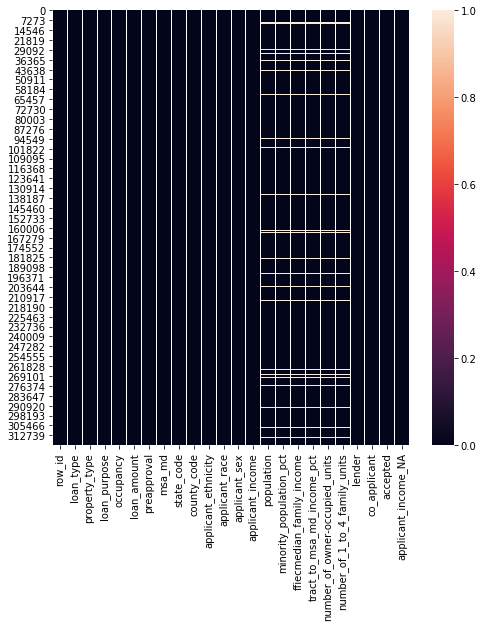

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.1 taking care of missing values in population

In [ ]:
train.population.isnull().mean()

0.044959375

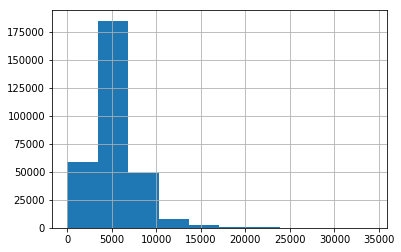

In [ ]:
train.population.hist()

In [ ]:
train.population.mean(),train.population.median()

(5419.888018507066, 4976.0)

In [ ]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA'],
      dtype='object')

In [ ]:
train_population = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income','applicant_income_NA', 'population']]
train_population.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population
0,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,0,1993.0
1,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,0,4402.0
2,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,0,7829.0
3,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,0,4691.0
4,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,0,2408.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_population, train.accepted, test_size=0.33, random_state=42)

In [ ]:
mean = X_train.population.mean()
median = X_train.population.median()
mean,median

(5418.1763023553185, 4978.0)

In [ ]:
impute_na(X_train,'population',mean,median)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_mean,population_median
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,0,4664.0,4664.0,4664.0
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,0,3238.0,3238.0,3238.0
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,0,3588.0,3588.0,3588.0
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,0,4712.0,4712.0,4712.0
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,0,6830.0,6830.0,6830.0


In [ ]:
impute_na(X_test,'population',mean,median)

In [ ]:
#addition missingness features

# create variable indicating missingness in population
X_train['population_NA'] = np.where(X_train.population.isnull(),1,0)
X_test['population_NA'] = np.where(X_test.population.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_mean,population_median,population_NA
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,0,4664.0,4664.0,4664.0,0
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,0,3238.0,3238.0,3238.0,0
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,0,3588.0,3588.0,3588.0,0
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,0,4712.0,4712.0,4712.0,0
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,0,6830.0,6830.0,6830.0,0


In [ ]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## logistic reg 1.1

In [ ]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['population','population_median','population_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['population','population_median','population_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['population','population_median','population_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit.fit(X_train.drop(['population','population_mean','population_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['population','population_mean','population_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['population','population_mean','population_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['population','population_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['population','population_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['population','population_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit.fit(X_train.drop(['population','population_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['population','population_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['population','population_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6607818458765429
Test set mean imputation
Logistic Reg roc_auc: 0.658548568970055

Train set median imputation
Logistic Reg roc-auc: 0.6609439430122419
Test set median imputation
Logistic Reg roc_auc: 0.6586928103402898

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6818437196416925
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6800682325948234

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6818437232094652
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6800682272141283



## concluding on population missing values
the missing data in the population has predictive powers to the target variable 

best approach to treat population missing values = mean imputation and missingness

In [ ]:
# inplementation based on the conclussion above in applicant_income
train['population_NA'] = np.where(train.population.isnull(),1,0)
test['population_NA'] = np.where(test.population.isnull(),1,0)
train.population.fillna(train.population.mean(),inplace=True)
test.population.fillna(train.population.mean(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA
0,110049,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0
1,83668,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0
2,253898,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0
3,97905,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0
4,417495,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0


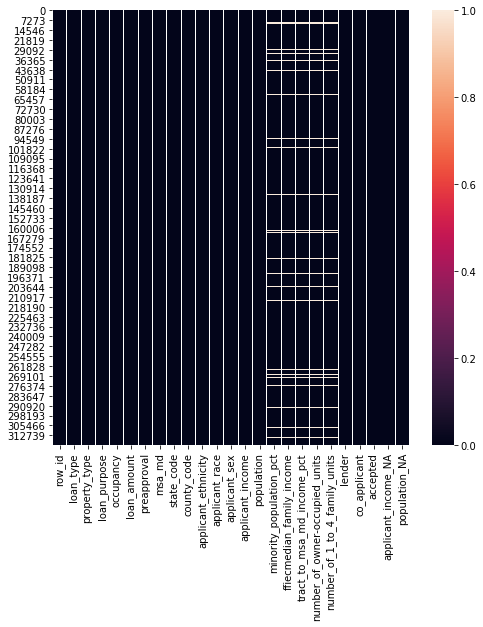

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.2 taking care of missing values in minority_population_pct

In [ ]:
train.minority_population_pct.isnull().mean()

0.0449625

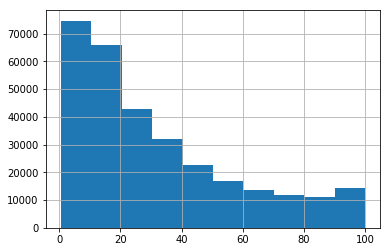

In [ ]:
train.minority_population_pct.hist()

In [ ]:
train.minority_population_pct.mean(),train.minority_population_pct.median()

(31.66157267712057, 22.917)

In [ ]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA'],
      dtype='object')

In [ ]:
train_minority_population_pct = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income','applicant_income_NA', 'population','population_NA','minority_population_pct']]
train_minority_population_pct.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_NA,minority_population_pct
0,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,0,1993.0,0,29.525
1,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,0,4402.0,0,42.265
2,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,0,7829.0,0,44.841
3,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,0,4691.0,0,9.089
4,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,0,2408.0,0,30.840


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_minority_population_pct, train.accepted, test_size=0.33, random_state=42)

In [ ]:
mean = X_train.minority_population_pct.mean()
median = X_train.minority_population_pct.median()
mean,median

(31.644552516630018, 22.898000000000003)

In [ ]:
impute_na(X_train,'minority_population_pct',mean,median)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_NA,minority_population_pct,minority_population_pct_mean,minority_population_pct_median
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,0,4664.0,0,35.502,35.502,35.502
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,0,3238.0,0,2.861,2.861,2.861
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,0,3588.0,0,1.400,1.400,1.400
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,0,4712.0,0,14.514,14.514,14.514
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,0,6830.0,0,33.684,33.684,33.684


In [ ]:
impute_na(X_test,'minority_population_pct',mean,median)

In [ ]:
#addition missingness features

# create variable indicating missingness in population
X_train['minority_population_pct_NA'] = np.where(X_train.minority_population_pct.isnull(),1,0)
X_test['minority_population_pct_NA'] = np.where(X_test.minority_population_pct.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_NA,minority_population_pct,minority_population_pct_mean,minority_population_pct_median,minority_population_pct_NA
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,0,4664.0,0,35.502,35.502,35.502,0
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,0,3238.0,0,2.861,2.861,2.861,0
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,0,3588.0,0,1.400,1.400,1.400,0
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,0,4712.0,0,14.514,14.514,14.514,0
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,0,6830.0,0,33.684,33.684,33.684,0


In [ ]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.2 logistic reg

In [ ]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['minority_population_pct','minority_population_pct_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['minority_population_pct','minority_population_pct_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['minority_population_pct','minority_population_pct_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['minority_population_pct','minority_population_pct_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['minority_population_pct','minority_population_pct_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['minority_population_pct','minority_population_pct_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['minority_population_pct','minority_population_pct_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['minority_population_pct','minority_population_pct_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['minority_population_pct','minority_population_pct_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['minority_population_pct','minority_population_pct_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6871162571675211
Logistic Reg accuracy: 0.6334561567164179
Test set mean imputation
Logistic Reg roc_auc: 0.6856859146925225
Logistic Reg accuracy: 0.6320549242424243

Train set median imputation
Logistic Reg roc-auc: 0.6871166227336833
Logistic Reg accuracy: 0.6334561567164179
Test set median imputation
Logistic Reg roc_auc: 0.6856858809734998
Logistic Reg accuracy: 0.6320549242424243

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.687122811078753
Logistic Reg accuracy: 0.6334701492537314
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6856863135813874
Logistic Reg accuracy: 0.6320549242424243

Train set median imputation and missingness
Logistic Reg roc-auc: 0.687122762609257
Logistic Reg accuracy: 0.6334701492537314
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6856862866779119
Logistic Reg accuracy: 0.6320549242424243



## concluding on minority_population_pct missing values
the missing data in the minority_population_pct has predictive powers to the target variable 

best approach to treat minority_population_pct missing values = median imputation

In [ ]:
# inplementation based on the conclussion above in minority_population_pct
train.minority_population_pct.fillna(train.minority_population_pct.median(),inplace=True)
test.minority_population_pct.fillna(train.minority_population_pct.median(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA
0,110049,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0
1,83668,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0
2,253898,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0
3,97905,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0
4,417495,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0


## note that addition pf missingness for minority_population_pct reduces the accuracy 
## because the missingness has been captured by the previous case 
## since missingness is across same rows 


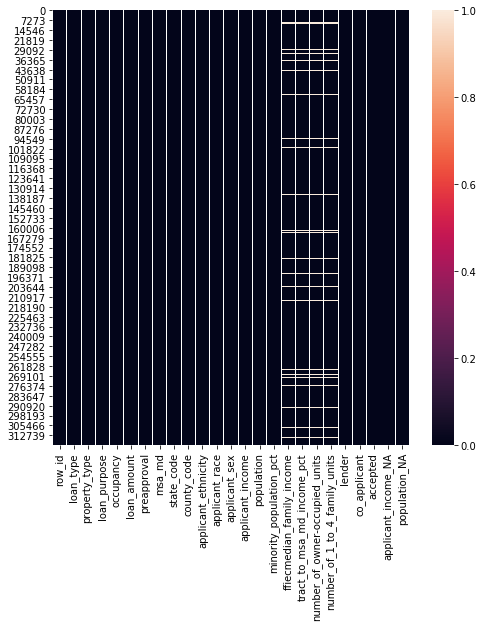

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.3 taking care of missing values in ffiecmedian_family_income

In [ ]:
train.ffiecmedian_family_income.isnull().mean()

0.044903125

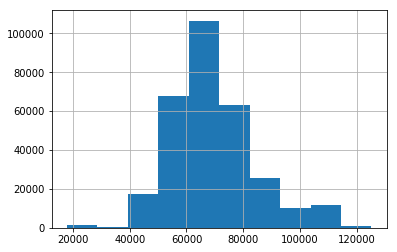

In [ ]:
train.ffiecmedian_family_income.hist()

In [ ]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA'],
      dtype='object')

In [ ]:
train_ffiecmedian_family_income = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income','applicant_income_NA', 'population','population_NA','minority_population_pct','ffiecmedian_family_income']]
train_ffiecmedian_family_income.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_NA,minority_population_pct,ffiecmedian_family_income
0,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,0,1993.0,0,29.525,58433.0
1,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,0,4402.0,0,42.265,109352.0
2,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,0,7829.0,0,44.841,98621.0
3,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,0,4691.0,0,9.089,112005.0
4,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,0,2408.0,0,30.840,75925.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_ffiecmedian_family_income, train.accepted, test_size=0.33, random_state=42)

In [ ]:
mean = X_train.ffiecmedian_family_income.mean()
median = X_train.ffiecmedian_family_income.median()
mean,median

(69235.62545690568, 67530.0)

In [ ]:
impute_na(X_train,'ffiecmedian_family_income',mean,median)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_NA,minority_population_pct,ffiecmedian_family_income,ffiecmedian_family_income_mean,ffiecmedian_family_income_median
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,0,4664.0,0,35.502,61596.0,61596.0,61596.0
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,0,3238.0,0,2.861,52637.0,52637.0,52637.0
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,0,3588.0,0,1.400,54685.0,54685.0,54685.0
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,0,4712.0,0,14.514,69057.0,69057.0,69057.0
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,0,6830.0,0,33.684,68914.0,68914.0,68914.0


In [ ]:
impute_na(X_test,'ffiecmedian_family_income',mean,median)

In [ ]:
#addition missingness features

# create variable indicating missingness in population
X_train['ffiecmedian_family_income_NA'] = np.where(X_train.ffiecmedian_family_income.isnull(),1,0)
X_test['ffiecmedian_family_income_NA'] = np.where(X_test.ffiecmedian_family_income.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_NA,minority_population_pct,ffiecmedian_family_income,ffiecmedian_family_income_mean,ffiecmedian_family_income_median,ffiecmedian_family_income_NA
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,0,4664.0,0,35.502,61596.0,61596.0,61596.0,0
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,0,3238.0,0,2.861,52637.0,52637.0,52637.0,0
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,0,3588.0,0,1.400,54685.0,54685.0,54685.0,0
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,0,4712.0,0,14.514,69057.0,69057.0,69057.0,0
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,0,6830.0,0,33.684,68914.0,68914.0,68914.0,0


In [ ]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.3 logistic reg

In [ ]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6883140849519082
Logistic Reg accuracy: 0.634472947761194
Test set mean imputation
Logistic Reg roc_auc: 0.6866717638589398
Logistic Reg accuracy: 0.6328125

Train set median imputation
Logistic Reg roc-auc: 0.6883139170925585
Logistic Reg accuracy: 0.634472947761194
Test set median imputation
Logistic Reg roc_auc: 0.6866714166247481
Logistic Reg accuracy: 0.6328219696969697

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6883779414678649
Logistic Reg accuracy: 0.6344962686567164
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6866686954278691
Logistic Reg accuracy: 0.6328030303030303

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6883780245708607
Logistic Reg accuracy: 0.6344962686567164
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6866687750621568
Logistic Reg accuracy: 0.6328030303030303



## concluding on ffiecmedian_family_income missing values
the missing data in the ffiecmedian_family_income has predictive powers to the target variable 

best approach to treat ffiecmedian_family_income missing values = median imputation

In [ ]:
# inplementation based on the conclussion above in applicant_income
train.ffiecmedian_family_income.fillna(train.ffiecmedian_family_income.mean(),inplace=True)
test.ffiecmedian_family_income.fillna(train.ffiecmedian_family_income.mean(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA
0,110049,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0
1,83668,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0
2,253898,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0
3,97905,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0
4,417495,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0


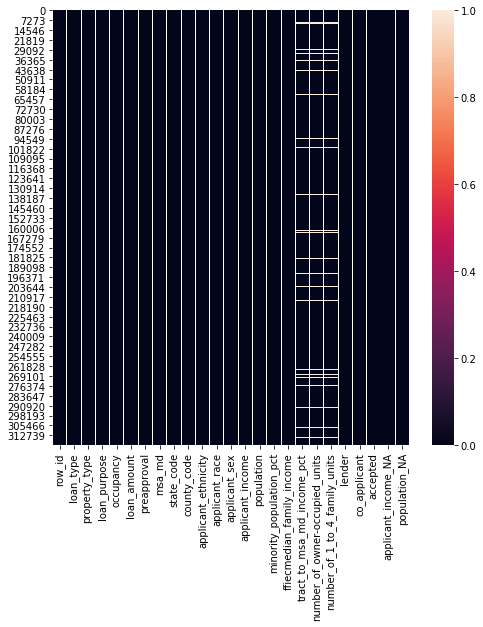

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.4 taking care of missing values in tract_to_msa_md_income_pct

In [ ]:
train.tract_to_msa_md_income_pct.isnull().mean()

0.045071875

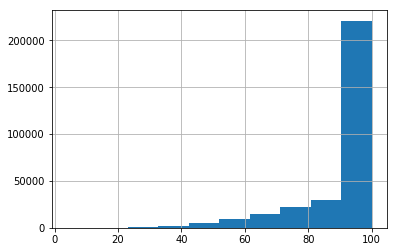

In [ ]:
train.tract_to_msa_md_income_pct.hist()

In [ ]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA'],
      dtype='object')

In [ ]:
train_tract_to_msa_md_income_pct = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income','applicant_income_NA',
       'population_NA','tract_to_msa_md_income_pct']]
train_tract_to_msa_md_income_pct.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,applicant_income_NA,population_NA,tract_to_msa_md_income_pct
0,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,0,0,68.959
1,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,0,0,100.000
2,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,0,0,100.000
3,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,0,0,100.000
4,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,0,0,92.052


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_tract_to_msa_md_income_pct, train.accepted, test_size=0.33, random_state=42)

In [ ]:
mean = X_train.tract_to_msa_md_income_pct.mean()
median = X_train.tract_to_msa_md_income_pct.median()
mean,median

(91.82866221994482, 100.0)

In [ ]:
impute_na(X_train,'tract_to_msa_md_income_pct',mean,median)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,applicant_income_NA,population_NA,tract_to_msa_md_income_pct,tract_to_msa_md_income_pct_mean,tract_to_msa_md_income_pct_median
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,4664.0,35.502,61596.0,0,0,100.000,100.000,100.000
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,3238.0,2.861,52637.0,0,0,100.000,100.000,100.000
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,3588.0,1.400,54685.0,0,0,90.838,90.838,90.838
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,4712.0,14.514,69057.0,0,0,100.000,100.000,100.000
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,6830.0,33.684,68914.0,0,0,100.000,100.000,100.000


In [ ]:
impute_na(X_test,'tract_to_msa_md_income_pct',mean,median)

In [ ]:
#addition missingness features

# create variable indicating missingness in population
X_train['tract_to_msa_md_income_pct_NA'] = np.where(X_train.tract_to_msa_md_income_pct.isnull(),1,0)
X_test['tract_to_msa_md_income_pct_NA'] = np.where(X_test.tract_to_msa_md_income_pct.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,applicant_income_NA,population_NA,tract_to_msa_md_income_pct,tract_to_msa_md_income_pct_mean,tract_to_msa_md_income_pct_median,tract_to_msa_md_income_pct_NA
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,4664.0,35.502,61596.0,0,0,100.000,100.000,100.000,0
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,3238.0,2.861,52637.0,0,0,100.000,100.000,100.000,0
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,3588.0,1.400,54685.0,0,0,90.838,90.838,90.838,0
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,4712.0,14.514,69057.0,0,0,100.000,100.000,100.000,0
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,6830.0,33.684,68914.0,0,0,100.000,100.000,100.000,0


In [ ]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.4 logistic reg

In [ ]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6895137701100044
Logistic Reg accuracy: 0.6351305970149254
Test set mean imputation
Logistic Reg roc_auc: 0.6881546185071017
Logistic Reg accuracy: 0.6344318181818182

Train set median imputation
Logistic Reg roc-auc: 0.6895122352716392
Logistic Reg accuracy: 0.6351445895522388
Test set median imputation
Logistic Reg roc_auc: 0.6881550410710252
Logistic Reg accuracy: 0.6344128787878788

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6895317100888585
Logistic Reg accuracy: 0.635107276119403
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6881529239468518
Logistic Reg accuracy: 0.6343939393939394

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6895317533372238
Logistic Reg accuracy: 0.6351119402985075
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6881529210771478
Logistic Reg accuracy: 0.6343939393939394



## concluding on tract_to_msa_md_income_pct missing values
the missing data in the tract_to_msa_md_income_pct has predictive powers to the target variable 

best approach to treat tract_to_msa_md_income_pct missing values = mean imputation

In [ ]:
# inplementation based on the conclussion above in applicant_income
train.tract_to_msa_md_income_pct.fillna(train.tract_to_msa_md_income_pct.mean(),inplace=True)
test.tract_to_msa_md_income_pct.fillna(train.tract_to_msa_md_income_pct.mean(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA
0,110049,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0
1,83668,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0
2,253898,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0
3,97905,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0
4,417495,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0


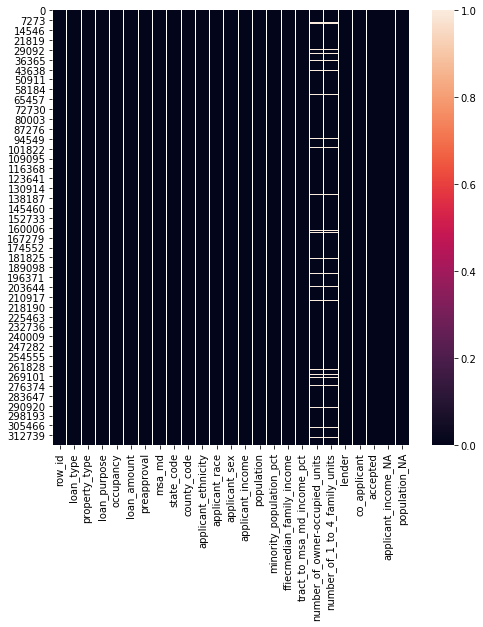

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.5 taking care of missing values in number_of_owner-occupied_units

In [ ]:
train['number_of_owner-occupied_units'].isnull().mean()

0.045184375

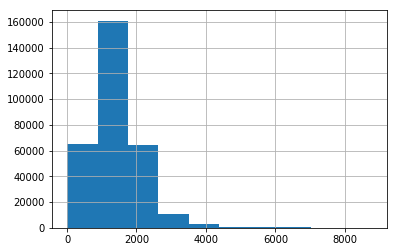

In [ ]:
train['number_of_owner-occupied_units'].hist()

In [ ]:
# list(train.columns)

In [ ]:
# train.columns=['row_id','loan_type','property_type','loan_purpose','occupancy','loan_amount','preapproval','msa_md','state_code','county_code','applicant_ethnicity','applicant_race',
#  'applicant_sex','applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner_occupied_units','number_of_1_to_4_family_units',
#  'lender','co_applicant','accepted','applicant_income_NA','population_NA']

In [ ]:
# test.columns=['row_id','loan_type',
#  'property_type','loan_purpose',
#  'occupancy','loan_amount','preapproval','msa_md','state_code','county_code','applicant_ethnicity','applicant_race','applicant_sex','applicant_income','population','minority_population_pct',
#  'ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner_occupied_units','number_of_1_to_4_family_units','lender','co_applicant','applicant_income_NA',
#  'population_NA']

In [ ]:
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA
0,110049,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0
1,83668,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0
2,253898,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0
3,97905,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0
4,417495,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0


In [ ]:
train_number_of_owner_occupied_units = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units','applicant_income_NA',
       'population_NA']]
train_number_of_owner_occupied_units.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,applicant_income_NA,population_NA
0,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,0,0
1,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,0,0
2,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,0,0
3,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,0,0
4,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_number_of_owner_occupied_units, train.accepted, test_size=0.33, random_state=42)

In [ ]:
mean = X_train['number_of_owner-occupied_units'].mean()
median = X_train['number_of_owner-occupied_units'].median()
mean,median

(1427.9742489479902, 1328.0)

In [ ]:
impute_na(X_train,'number_of_owner-occupied_units',mean,median)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,applicant_income_NA,population_NA,number_of_owner-occupied_units_mean,number_of_owner-occupied_units_median
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,4664.0,35.502,61596.0,100.000,1712.0,0,0,1712.0,1712.0
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,3238.0,2.861,52637.0,100.000,1160.0,0,0,1160.0,1160.0
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,3588.0,1.400,54685.0,90.838,1152.0,0,0,1152.0,1152.0
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,4712.0,14.514,69057.0,100.000,1508.0,0,0,1508.0,1508.0
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,6830.0,33.684,68914.0,100.000,1454.0,0,0,1454.0,1454.0


In [ ]:
impute_na(X_test,'number_of_owner-occupied_units',mean,median)

In [ ]:
#addition missingness features

# create variable indicating missingness in population
X_train['number_of_owner-occupied_units_NA'] = np.where(X_train['number_of_owner-occupied_units'].isnull(),1,0)
X_test['number_of_owner-occupied_units_NA'] = np.where(X_test['number_of_owner-occupied_units'].isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,applicant_income_NA,population_NA,number_of_owner-occupied_units_mean,number_of_owner-occupied_units_median,number_of_owner-occupied_units_NA
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,4664.0,35.502,61596.0,100.000,1712.0,0,0,1712.0,1712.0,0
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,3238.0,2.861,52637.0,100.000,1160.0,0,0,1160.0,1160.0,0
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,3588.0,1.400,54685.0,90.838,1152.0,0,0,1152.0,1152.0,0
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,4712.0,14.514,69057.0,100.000,1508.0,0,0,1508.0,1508.0,0
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,6830.0,33.684,68914.0,100.000,1454.0,0,0,1454.0,1454.0,0


In [ ]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.5 logistic reg

In [ ]:
# # comparing the performance of logistic Regression using the applicant_income as case study 

# logit = LogisticRegression(random_state=42,C=1000)
# logit.fit(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1),y_train)
# print('Train set mean imputation')
# pred = logit.predict_proba(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1))
# print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
# pred = logit.predict(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1))
# print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
# print('Test set mean imputation')
# pred = logit.predict_proba(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1))
# print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
# pred = logit.predict(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1))
# print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
# print()


# logit.fit(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1),y_train)
# print('Train set median imputation')
# pred = logit.predict_proba(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1))
# print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
# pred = logit.predict(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1))
# print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
# print('Test set median imputation')
# pred = logit.predict_proba(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1))
# print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
# pred = logit.predict(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1))
# print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
# print()



# logit = LogisticRegression(random_state=42,C=1000)
# logit.fit(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1),y_train)
# print('Train set mean imputation and missingness')
# pred = logit.predict_proba(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1))
# print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
# pred = logit.predict(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1))
# print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
# print('Test set mean imputation and missingness')
# pred = logit.predict_proba(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1))
# print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
# pred = logit.predict(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1))
# print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
# print()


# logit.fit(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1),y_train)
# print('Train set median imputation and missingness')
# pred = logit.predict_proba(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1))
# print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
# pred = logit.predict(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1))
# print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
# print('Test set median imputation and missingness')
# pred = logit.predict_proba(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1))
# print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
# pred = logit.predict(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1))
# print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
# print()



## concluding on number_of_owner_occupied_units missing values
the missing data in the number_of_owner_occupied_units has predictive powers to the target variable 

best approach to treat number_of_owner_occupied_units missing values = median imputation and missingness

In [ ]:
# inplementation based on the conclussion above in applicant_income
train['number_of_owner-occupied_units_NA'] = np.where(train['number_of_owner-occupied_units'].isnull(),1,0)
test['number_of_owner-occupied_units_NA'] = np.where(test['number_of_owner-occupied_units'].isnull(),1,0)
train['number_of_owner-occupied_units'].fillna(train['number_of_owner-occupied_units'].median(),inplace=True)
test['number_of_owner-occupied_units'].fillna(train['number_of_owner-occupied_units'].median(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA
0,110049,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0,0
1,83668,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0,0
2,253898,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0,0
3,97905,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0,0
4,417495,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0,0


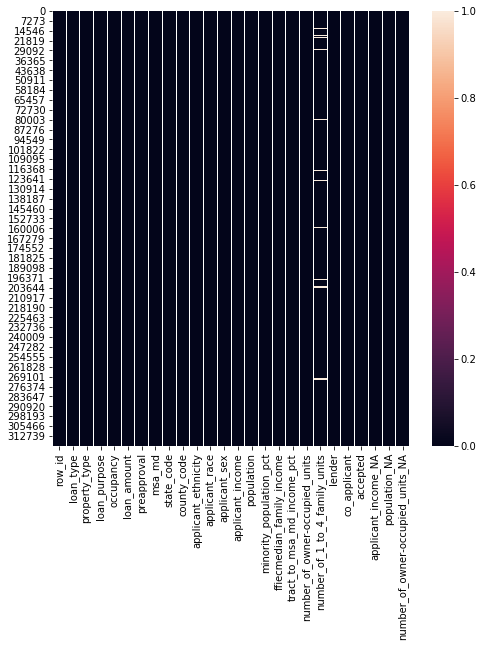

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.5 taking care of missing values in number_of_1_to_4_family_units

In [ ]:
train.number_of_1_to_4_family_units.isnull().mean()

0.04509375

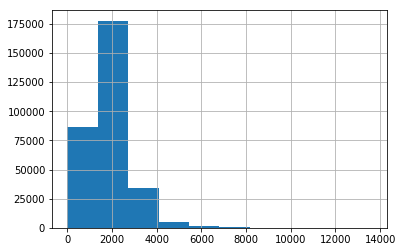

In [ ]:
train.number_of_1_to_4_family_units.hist()

In [ ]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA', 'number_of_owner-occupied_units_NA'],
      dtype='object')

In [ ]:
train_number_of_1_to_4_family_units = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'applicant_income_NA',
       'population_NA', 'number_of_owner-occupied_units_NA']]
train_number_of_1_to_4_family_units.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA
0,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,0,0,0
1,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,0,0,0
2,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,0,0,0
3,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,0,0,0
4,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_number_of_1_to_4_family_units, train.accepted, test_size=0.33, random_state=42)

In [ ]:
mean = X_train.number_of_1_to_4_family_units.mean()
median = X_train.number_of_1_to_4_family_units.median()
mean,median

(1885.9446215275575, 1754.0)

In [ ]:
impute_na(X_train,'number_of_1_to_4_family_units',mean,median)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_mean,number_of_1_to_4_family_units_median
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,4664.0,35.502,61596.0,100.000,1712.0,1504.0,0,0,0,1504.0,1504.0
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,3238.0,2.861,52637.0,100.000,1160.0,1501.0,0,0,0,1501.0,1501.0
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,3588.0,1.400,54685.0,90.838,1152.0,1428.0,0,0,0,1428.0,1428.0
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,4712.0,14.514,69057.0,100.000,1508.0,1907.0,0,0,0,1907.0,1907.0
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,6830.0,33.684,68914.0,100.000,1454.0,2107.0,0,0,0,2107.0,2107.0


In [ ]:
impute_na(X_test,'number_of_1_to_4_family_units',mean,median)

In [ ]:
#addition missingness features

# create variable indicating missingness in population
X_train['number_of_1_to_4_family_units_NA'] = np.where(X_train.number_of_1_to_4_family_units.isnull(),1,0)
X_test['number_of_1_to_4_family_units_NA'] = np.where(X_test.number_of_1_to_4_family_units.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_mean,number_of_1_to_4_family_units_median,number_of_1_to_4_family_units_NA
133967,1,1,1,1,587.0,2,24,37,20,2,2,2,109.0,4664.0,35.502,61596.0,100.000,1712.0,1504.0,0,0,0,1504.0,1504.0,0
186972,2,1,1,1,107.0,3,36,9,7,2,5,2,25.0,3238.0,2.861,52637.0,100.000,1160.0,1501.0,0,0,0,1501.0,1501.0,0
183572,1,1,3,1,125.0,3,-1,22,299,2,5,1,16.0,3588.0,1.400,54685.0,90.838,1152.0,1428.0,0,0,0,1428.0,1428.0,0
42934,1,1,3,1,53.0,3,22,10,297,2,5,2,23.0,4712.0,14.514,69057.0,100.000,1508.0,1907.0,0,0,0,1907.0,1907.0,0
194135,2,1,3,1,12.0,3,333,6,299,2,5,1,26.0,6830.0,33.684,68914.0,100.000,1454.0,2107.0,0,0,0,2107.0,2107.0,0


In [ ]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.6 logistic reg

In [ ]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6903518561642867
Logistic Reg accuracy: 0.635722947761194
Test set mean imputation
Logistic Reg roc_auc: 0.6888856045923013
Logistic Reg accuracy: 0.6346496212121212

Train set median imputation
Logistic Reg roc-auc: 0.6903514376036485
Logistic Reg accuracy: 0.6357182835820896
Test set median imputation
Logistic Reg roc_auc: 0.6888852465967192
Logistic Reg accuracy: 0.6346496212121212

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6903574752320807
Logistic Reg accuracy: 0.6357042910447761
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.688892825843866
Logistic Reg accuracy: 0.6346685606060606

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6903575188285214
Logistic Reg accuracy: 0.6357042910447761
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6888928391162474
Logistic Reg accuracy: 0.6346685606060606



## concluding on number_of_1_to_4_family_units missing values
the missing data in the number_of_1_to_4_family_units has predictive powers to the target variable 

best approach to treat number_of_1_to_4_family_units missing values = mean imputation and missingness

In [ ]:
# inplementation based on the conclussion above in applicant_income
train['number_of_1_to_4_family_units_NA'] = np.where(train.number_of_1_to_4_family_units.isnull(),1,0)
test['number_of_1_to_4_family_units_NA'] = np.where(test.number_of_1_to_4_family_units.isnull(),1,0)
train.number_of_1_to_4_family_units.fillna(train.number_of_1_to_4_family_units.mean(),inplace=True)
test.number_of_1_to_4_family_units.fillna(train.number_of_1_to_4_family_units.mean(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA
0,110049,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0,0,0
1,83668,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0,0,0
2,253898,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0,0,0
3,97905,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0,0,0
4,417495,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0,0,0


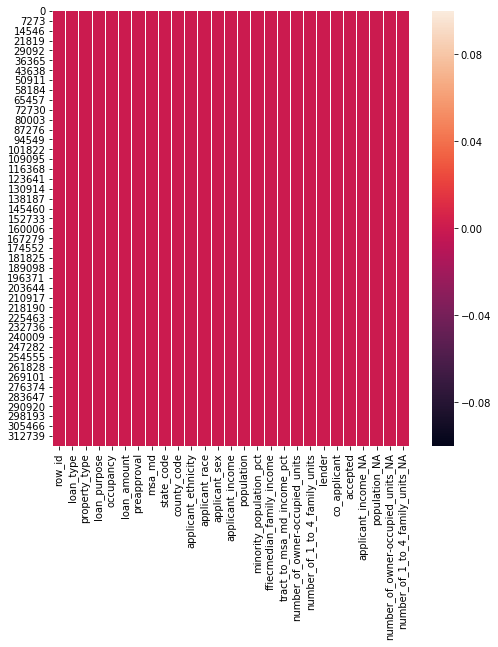

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

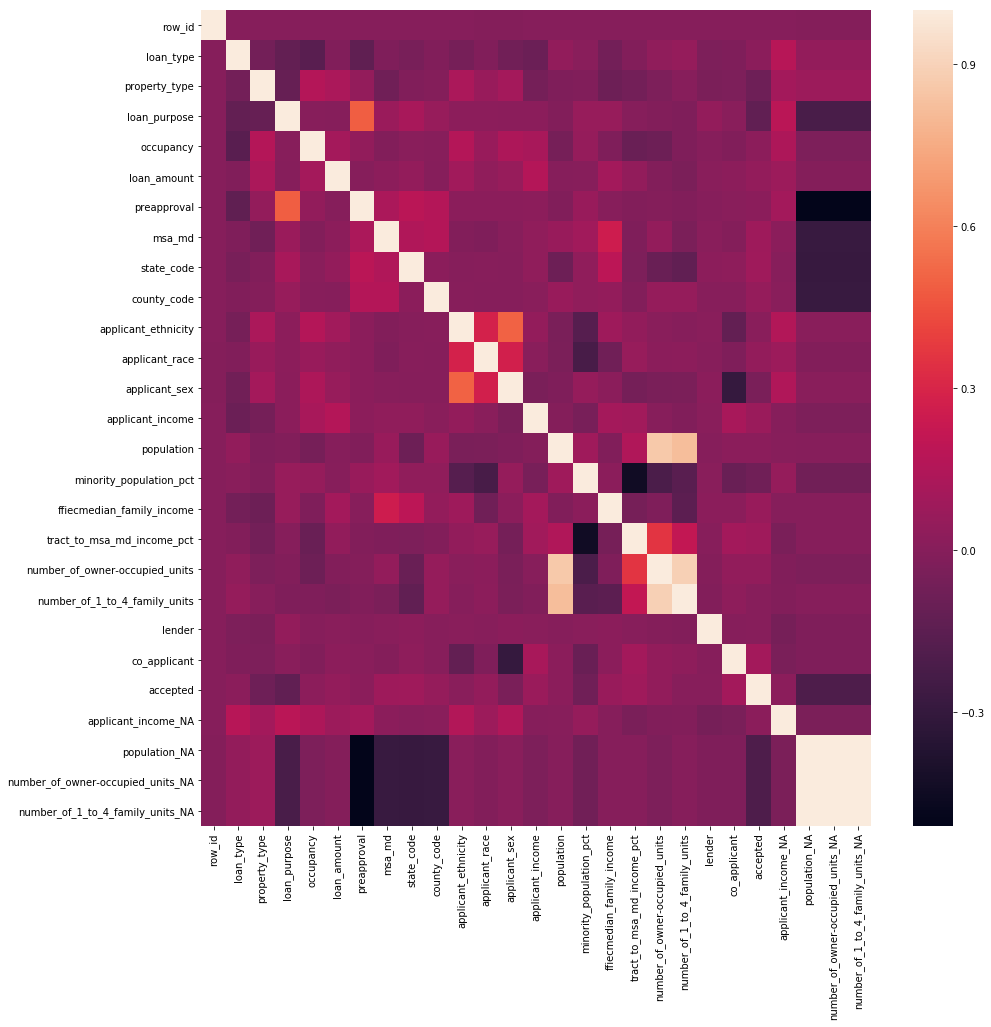

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr())

In [ ]:
train_copy = train.copy()
test_copy = test.copy()

## 2.0 OUTLIERS

In [ ]:
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA
0,110049,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0,0,0
1,83668,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0,0,0
2,253898,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0,0,0
3,97905,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0,0,0
4,417495,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0,0,0


In [ ]:
test_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA
0,304897,2,1,3,1,113.0,3,356,5,98,3,5,1,47.0,3256.0,24.824,52771.0,100.000,800.0,1013.0,5684,False,0,0,0,0
1,386541,1,1,2,1,10.0,3,10,34,11,2,5,1,12.0,7274.0,16.243,87259.0,100.000,2097.0,2674.0,4701,True,0,0,0,0
2,453817,1,1,3,1,270.0,3,24,37,20,1,5,2,75.0,4835.0,86.704,64204.0,100.000,864.0,1049.0,5123,True,0,0,0,0
3,352553,3,1,1,1,514.0,3,10,34,11,2,5,1,159.0,7542.0,15.455,87564.0,97.056,2529.0,2985.0,814,False,0,0,0,0
4,273259,1,1,1,1,92.0,3,150,14,3,2,5,1,43.0,5407.0,18.518,63502.0,100.000,1747.0,1888.0,1143,False,0,0,0,0


## 2.0 loan amount 

Text(0.5, 0, 'loan_amount')

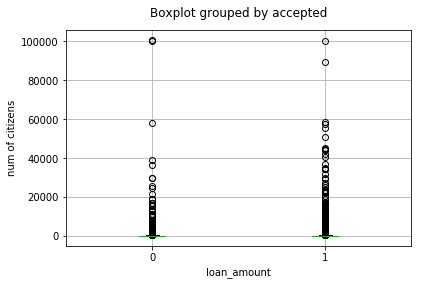

In [ ]:
fig = train_copy.boxplot(column='loan_amount',by='accepted')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('loan_amount')

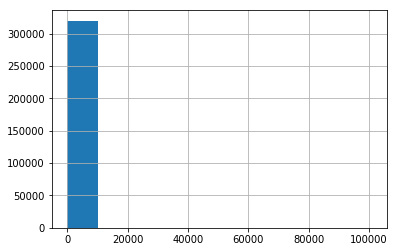

In [ ]:
train_copy.loan_amount.hist()

In [ ]:
# upper and lower boundaries for the outliers according to interquantile proximity rule

IQR = train_copy.loan_amount.quantile(0.75) - train_copy.loan_amount.quantile(0.25)

lower_fence = train_copy.loan_amount.quantile(0.25) - (IQR * 1.0)
Upper_fence = train_copy.loan_amount.quantile(0.75) + (IQR * 1.5)
lower_fence,Upper_fence

(-80.0, 525.5)

In [ ]:
train_copy.loc[train_copy.loan_amount>Upper_fence,'loan_amount']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.loan_amount>Upper_fence,'loan_amount']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
train_copy.loc[train_copy.loan_amount<lower_fence,'loan_amount']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.loan_amount<lower_fence,'loan_amount']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)


Text(0.5, 0, 'loan_amount')

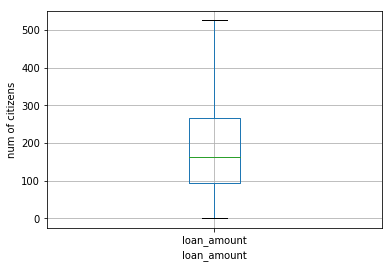

In [ ]:
fig = train_copy.boxplot(column='loan_amount')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('loan_amount')

In [ ]:
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA
0,110049,1,1,2,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0,0,0
1,83668,1,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0,0,0
2,253898,1,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0,0,0
3,97905,1,1,3,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0,0,0
4,417495,1,1,3,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0,0,0


## 2.1 msa_sd

Text(0.5, 0, 'msa_md')

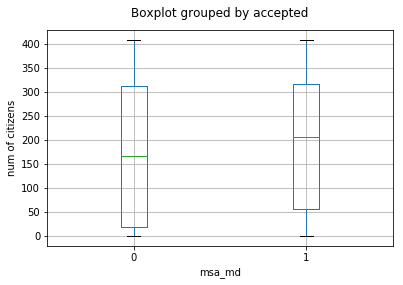

In [ ]:
fig = train_copy.boxplot(column='msa_md',by='accepted')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('msa_md')

## 2.2 applicant_income

Text(0.5, 0, 'applicant_income')

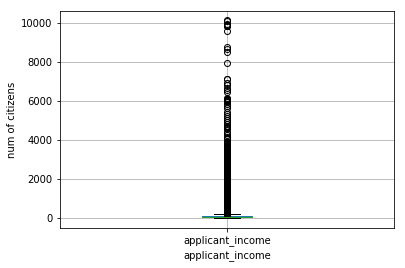

In [ ]:
fig = train_copy.boxplot(column='applicant_income')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('applicant_income')

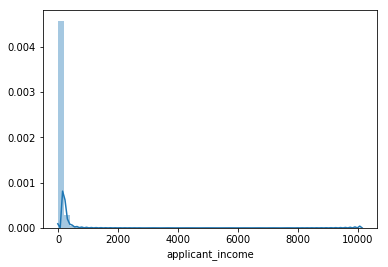

In [ ]:
sns.distplot(train_copy.applicant_income)

In [ ]:
train_copy.applicant_income.describe()

count    320000.000000
mean        102.270129
std         145.414041
min           1.000000
25%          49.000000
50%          79.000000
75%         112.000000
max       10139.000000
Name: applicant_income, dtype: float64

In [ ]:
upper_b = train_copy.applicant_income.mean() + 3*train_copy.applicant_income.std()
upper_b

538.5122512912164

In [ ]:
train_copy.loc[train_copy.applicant_income>upper_b,'applicant_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.applicant_income>upper_b,'applicant_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_copy, train_copy.accepted, test_size=0.33, random_state=42)

In [ ]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [ ]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.6996217387629459
Logistic Reg accuracy: 0.6464132462686567
Test set mean imputation
Logistic Reg roc_auc: 0.6985011359902895
Logistic Reg accuracy: 0.6465719696969697



## 3.0 Categorical features

In [ ]:
categorical_col = ['loan_type','property_type','loan_purpose','occupancy','preapproval','applicant_ethnicity','applicant_race','applicant_sex']

In [ ]:
df_cat_train = pd.DataFrame(data=train_copy,columns=categorical_col)
df_cat_test = pd.DataFrame(data=test_copy,columns=categorical_col)
df_cat_train.head()

,loan_type,property_type,loan_purpose,occupancy,preapproval,applicant_ethnicity,applicant_race,applicant_sex
0,1,1,2,1,3,2,5,1
1,1,1,1,1,2,2,5,1
2,1,1,1,1,3,1,5,1
3,1,1,3,1,3,2,5,1
4,1,1,3,1,3,1,5,1


In [ ]:
def freq_dist(df_categories):
    category_count = df_categories['property_type'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of property_type')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('property_type',fontsize = 12)
    plt.show()

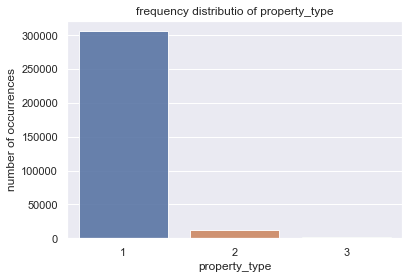

In [ ]:
freq_dist(df_cat_train)

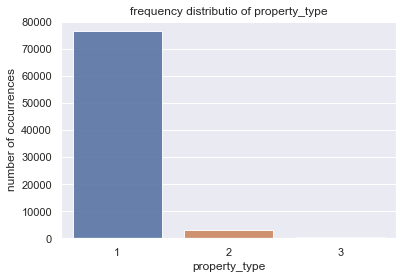

In [ ]:
freq_dist(df_cat_test)

In [ ]:
def freq_dist(df_categories):
    category_count = df_categories['loan_purpose'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of loan_purpose')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('loan_purpose',fontsize = 12)
    plt.show()

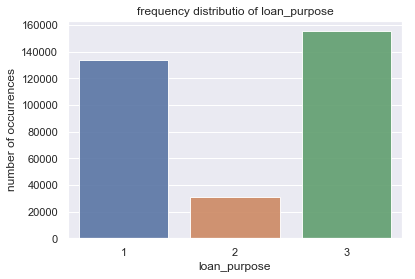

In [ ]:
freq_dist(df_cat_train)

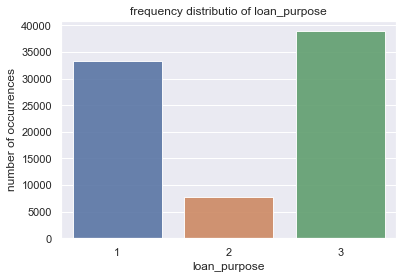

In [ ]:
freq_dist(df_cat_test)

# big change

In [ ]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['loan_purpose'],prefix='loan_purpose_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['loan_purpose'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['loan_purpose'],prefix='loan_purpose_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['loan_purpose'],inplace= True,axis=1)
df_cat_train.head()

,loan_type,property_type,occupancy,preapproval,applicant_ethnicity,applicant_race,applicant_sex,loan_purpose__1,loan_purpose__2,loan_purpose__3
0,1,1,1,3,2,5,1,0,1,0
1,1,1,1,2,2,5,1,1,0,0
2,1,1,1,3,1,5,1,1,0,0
3,1,1,1,3,2,5,1,0,0,1
4,1,1,1,3,1,5,1,0,0,1


In [ ]:
cols = ['loan_purpose__1','loan_purpose__2','loan_purpose__3']
col = 'loan_purpose'

In [ ]:
def categorical_func(train_df,test_df,df_new_cat_train,df_new_cat_test,col,cols):
    train_copy = pd.concat([train_df,df_new_cat_train[cols]],axis=1)
    train_copy.drop(columns=[col],inplace=True)
    test_copy = pd.concat([test_df,df_new_cat_test[cols]],axis=1)
    test_copy.drop(columns=[col],inplace=True)
    return train_copy,test_copy

In [ ]:
new_train , new_test = categorical_func(train_copy,test_copy,df_cat_train,df_cat_test,col,cols)
new_train.head()

,row_id,loan_type,property_type,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA,loan_purpose__1,loan_purpose__2,loan_purpose__3
0,110049,1,1,1,78.0,3,77,31,20,2,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0,0,0,0,1,0
1,83668,1,1,1,322.0,2,358,32,2,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0,0,0,1,0,0
2,253898,1,1,1,144.0,3,139,3,299,1,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0,0,0,1,0,0
3,97905,1,1,1,523.0,3,266,48,83,2,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0,0,0,0,0,1
4,417495,1,1,1,143.0,3,171,52,257,1,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0,0,0,0,0,1


In [ ]:
new_test.head()

,row_id,loan_type,property_type,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA,loan_purpose__1,loan_purpose__2,loan_purpose__3
0,304897,2,1,1,113.0,3,356,5,98,3,5,1,47.0,3256.0,24.824,52771.0,100.000,800.0,1013.0,5684,False,0,0,0,0,0,0,1
1,386541,1,1,1,10.0,3,10,34,11,2,5,1,12.0,7274.0,16.243,87259.0,100.000,2097.0,2674.0,4701,True,0,0,0,0,0,1,0
2,453817,1,1,1,270.0,3,24,37,20,1,5,2,75.0,4835.0,86.704,64204.0,100.000,864.0,1049.0,5123,True,0,0,0,0,0,0,1
3,352553,3,1,1,514.0,3,10,34,11,2,5,1,159.0,7542.0,15.455,87564.0,97.056,2529.0,2985.0,814,False,0,0,0,0,1,0,0
4,273259,1,1,1,92.0,3,150,14,3,2,5,1,43.0,5407.0,18.518,63502.0,100.000,1747.0,1888.0,1143,False,0,0,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_train, new_train.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [ ]:
# # base model

# logit = LogisticRegression(random_state=42,C=1000)
# logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
# print('Train set mean imputation')
# pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
# print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
# pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
# print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
# print('Test set mean imputation')
# pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
# print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
# pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
# print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
# print()


In [ ]:
#updating testcopy since there is improvement
train_copy = new_train
test_copy = new_test

In [ ]:
np.shape(train_copy),np.shape(test_copy)

((320000, 29), (80000, 28))

In [ ]:
# new_train.head()

In [ ]:
# new_test.head()

In [ ]:
df_cat_train.head()

,loan_type,property_type,occupancy,preapproval,applicant_ethnicity,applicant_race,applicant_sex,loan_purpose__1,loan_purpose__2,loan_purpose__3
0,1,1,1,3,2,5,1,0,1,0
1,1,1,1,2,2,5,1,1,0,0
2,1,1,1,3,1,5,1,1,0,0
3,1,1,1,3,2,5,1,0,0,1
4,1,1,1,3,1,5,1,0,0,1


In [ ]:
def freq_dist(df_categories):
    category_count = df_categories['preapproval'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of preapproval')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('preapproval',fontsize = 12)
    plt.show()

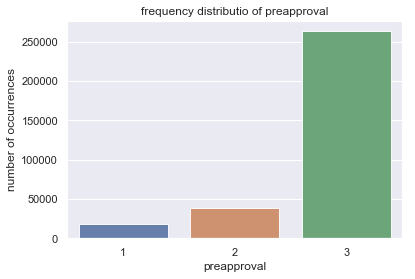

In [ ]:
freq_dist(df_cat_train)

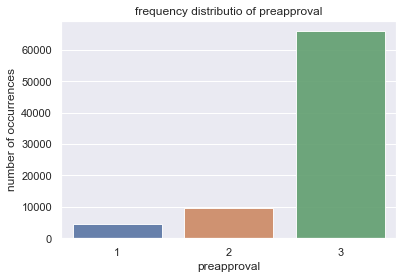

In [ ]:
freq_dist(df_cat_test)

In [ ]:
df_cat_train.head()

,loan_type,property_type,occupancy,preapproval,applicant_ethnicity,applicant_race,applicant_sex,loan_purpose__1,loan_purpose__2,loan_purpose__3
0,1,1,1,3,2,5,1,0,1,0
1,1,1,1,2,2,5,1,1,0,0
2,1,1,1,3,1,5,1,1,0,0
3,1,1,1,3,2,5,1,0,0,1
4,1,1,1,3,1,5,1,0,0,1


In [ ]:
def freq_dist(df_categories):
    category_count = df_categories['applicant_ethnicity'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of applicant_ethnicity')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('applicant_ethnicity',fontsize = 12)
    plt.show()

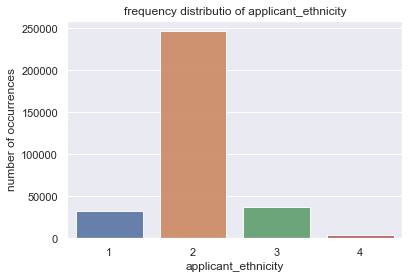

In [ ]:
freq_dist(df_cat_train)

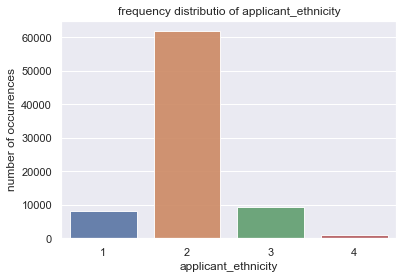

In [ ]:
freq_dist(df_cat_test)

In [ ]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['applicant_ethnicity'],prefix='applicant_ethnicity_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['applicant_ethnicity'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['applicant_ethnicity'],prefix='applicant_ethnicity_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['applicant_ethnicity'],inplace= True,axis=1)
df_cat_train.head()

,loan_type,property_type,occupancy,preapproval,applicant_race,applicant_sex,loan_purpose__1,loan_purpose__2,loan_purpose__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4
0,1,1,1,3,5,1,0,1,0,0,1,0,0
1,1,1,1,2,5,1,1,0,0,0,1,0,0
2,1,1,1,3,5,1,1,0,0,1,0,0,0
3,1,1,1,3,5,1,0,0,1,0,1,0,0
4,1,1,1,3,5,1,0,0,1,1,0,0,0


In [ ]:
cols = ['applicant_ethnicity__1','applicant_ethnicity__2','applicant_ethnicity__3','applicant_ethnicity__4']
col = 'applicant_ethnicity'

In [ ]:
new_train , new_test = categorical_func(train_copy,test_copy,df_cat_train,df_cat_test,col,cols)
new_train.head()

,row_id,loan_type,property_type,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA,loan_purpose__1,loan_purpose__2,loan_purpose__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4
0,110049,1,1,1,78.0,3,77,31,20,5,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0,0,0,0,1,0,0,1,0,0
1,83668,1,1,1,322.0,2,358,32,2,5,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0,0,0,1,0,0,0,1,0,0
2,253898,1,1,1,144.0,3,139,3,299,5,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0,0,0,1,0,0,1,0,0,0
3,97905,1,1,1,523.0,3,266,48,83,5,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0,0,0,0,0,1,0,1,0,0
4,417495,1,1,1,143.0,3,171,52,257,5,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0,0,0,0,0,1,1,0,0,0


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(new_train, new_train.accepted, test_size=0.33, random_state=42)

# #get cols names
# X_train_cols = list(X_train.columns)
# X_test_cols = list(X_test.columns)
# #standard scale 
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train))
# X_test = pd.DataFrame(scaler.transform(X_test))
# # rename the cols of the dataset again since scaler returns a numpy arrray
# X_train.columns=X_train_cols
# X_test.columns =X_test_cols

In [ ]:
# # base model

# logit = LogisticRegression(random_state=42,C=1000)
# logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
# print('Train set mean imputation')
# pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
# print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
# pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
# print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
# print('Test set mean imputation')
# pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
# print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
# pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
# print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
# print()


In [ ]:
#updating testcopy since there is improvement
train_copy = new_train
test_copy = new_test

In [ ]:
df_cat_train.head()

,loan_type,property_type,occupancy,preapproval,applicant_race,applicant_sex,loan_purpose__1,loan_purpose__2,loan_purpose__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4
0,1,1,1,3,5,1,0,1,0,0,1,0,0
1,1,1,1,2,5,1,1,0,0,0,1,0,0
2,1,1,1,3,5,1,1,0,0,1,0,0,0
3,1,1,1,3,5,1,0,0,1,0,1,0,0
4,1,1,1,3,5,1,0,0,1,1,0,0,0


In [ ]:
def freq_dist(df_categories):
    category_count = df_categories['applicant_race'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of applicant_race')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('applicant_race',fontsize = 12)
    plt.show()

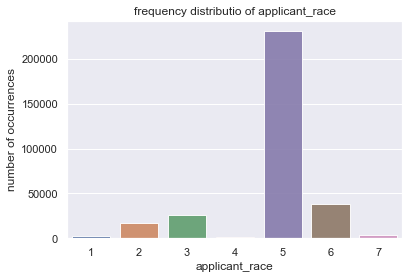

In [ ]:
freq_dist(df_cat_train)

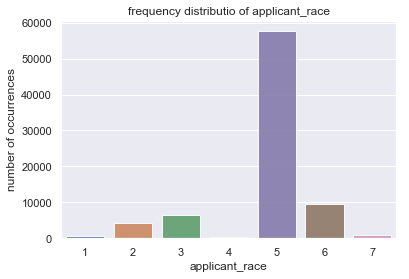

In [ ]:
freq_dist(df_cat_test)

In [ ]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['applicant_race'],prefix='applicant_race_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['applicant_race'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['applicant_race'],prefix='applicant_race_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['applicant_race'],inplace= True,axis=1)
df_cat_train.head()

,loan_type,property_type,occupancy,preapproval,applicant_sex,loan_purpose__1,loan_purpose__2,loan_purpose__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,applicant_race__1,applicant_race__2,applicant_race__3,applicant_race__4,applicant_race__5,applicant_race__6,applicant_race__7
0,1,1,1,3,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,1,1,1,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,1,1,3,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,1,1,3,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,1,1,1,3,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
cols = ['applicant_race__1','applicant_race__2','applicant_race__3','applicant_race__4','applicant_race__5','applicant_race__6','applicant_race__7']
col = 'applicant_race'

In [ ]:
new_train , new_test = categorical_func(train_copy,test_copy,df_cat_train,df_cat_test,col,cols)
new_train.head()

,row_id,loan_type,property_type,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA,loan_purpose__1,loan_purpose__2,loan_purpose__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,applicant_race__1,applicant_race__2,applicant_race__3,applicant_race__4,applicant_race__5,applicant_race__6,applicant_race__7
0,110049,1,1,1,78.0,3,77,31,20,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,83668,1,1,1,322.0,2,358,32,2,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,253898,1,1,1,144.0,3,139,3,299,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,97905,1,1,1,523.0,3,266,48,83,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,417495,1,1,1,143.0,3,171,52,257,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(new_train, new_train.accepted, test_size=0.33, random_state=42)

# #get cols names
# X_train_cols = list(X_train.columns)
# X_test_cols = list(X_test.columns)
# #standard scale 
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train))
# X_test = pd.DataFrame(scaler.transform(X_test))
# # rename the cols of the dataset again since scaler returns a numpy arrray
# X_train.columns=X_train_cols
# X_test.columns =X_test_cols

In [ ]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.707156862293692
Logistic Reg accuracy: 0.6515438432835821
Test set mean imputation
Logistic Reg roc_auc: 0.7056283807131638
Logistic Reg accuracy: 0.6508522727272728



In [ ]:
#drop dummies for the above feature
new_train.drop(columns=cols,inplace=True)
new_test.drop(columns=cols,inplace=True)
new_train.head()

,row_id,loan_type,property_type,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA,loan_purpose__1,loan_purpose__2,loan_purpose__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4
0,110049,1,1,1,78.0,3,77,31,20,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0,0,0,0,1,0,0,1,0,0
1,83668,1,1,1,322.0,2,358,32,2,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0,0,0,1,0,0,0,1,0,0
2,253898,1,1,1,144.0,3,139,3,299,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0,0,0,1,0,0,1,0,0,0
3,97905,1,1,1,523.0,3,266,48,83,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0,0,0,0,0,1,0,1,0,0
4,417495,1,1,1,143.0,3,171,52,257,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0,0,0,0,0,1,1,0,0,0


In [ ]:
df_cat_train.head()

,loan_type,property_type,occupancy,preapproval,applicant_sex,loan_purpose__1,loan_purpose__2,loan_purpose__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,applicant_race__1,applicant_race__2,applicant_race__3,applicant_race__4,applicant_race__5,applicant_race__6,applicant_race__7
0,1,1,1,3,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,1,1,1,2,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,1,1,3,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,1,1,3,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,1,1,1,3,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
np.shape(new_train),np.shape(new_test)

((320000, 31), (80000, 30))

In [ ]:
#updating testcopy since there is improvement
train_copy = new_train
test_copy = new_test

In [ ]:
new_train.head()

,row_id,loan_type,property_type,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA,loan_purpose__1,loan_purpose__2,loan_purpose__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4
0,110049,1,1,1,78.0,3,77,31,20,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0,0,0,0,1,0,0,1,0,0
1,83668,1,1,1,322.0,2,358,32,2,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0,0,0,1,0,0,0,1,0,0
2,253898,1,1,1,144.0,3,139,3,299,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0,0,0,1,0,0,1,0,0,0
3,97905,1,1,1,523.0,3,266,48,83,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0,0,0,0,0,1,0,1,0,0
4,417495,1,1,1,143.0,3,171,52,257,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0,0,0,0,0,1,1,0,0,0


In [ ]:
train_copy.shape,test_copy.shape

((320000, 31), (80000, 30))

## dont touch the next cell if not necessary

In [ ]:
#reserving copied version of train and set up to this stage 
train_copy1 = train_copy.copy()
test_copy1 = test_copy.copy()
train_copy1.to_csv('train_copy1.csv',index = False)
test_copy1.to_csv('test_copy1.csv',index = False)

## Analysis

In [ ]:
train_copy1 = pd.read_csv("train_copy1.csv")
test_copy1 = pd.read_csv("test_copy1.csv")

In [ ]:
np.shape(train_copy1),np.shape(test_copy1)

((320000, 31), (80000, 30))

In [ ]:
new_train = train_copy1
new_test = test_copy1

In [ ]:
new_train.head()

,row_id,loan_type,property_type,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA,loan_purpose__1,loan_purpose__2,loan_purpose__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4
0,110049,1,1,1,78.0,3,77,31,20,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0,0,0,0,1,0,0,1,0,0
1,83668,1,1,1,322.0,2,358,32,2,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0,0,0,1,0,0,0,1,0,0
2,253898,1,1,1,144.0,3,139,3,299,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0,0,0,1,0,0,1,0,0,0
3,97905,1,1,1,523.0,3,266,48,83,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0,0,0,0,0,1,0,1,0,0
4,417495,1,1,1,143.0,3,171,52,257,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0,0,0,0,0,1,1,0,0,0


In [ ]:
new_test.head()

,row_id,loan_type,property_type,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA,loan_purpose__1,loan_purpose__2,loan_purpose__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4
0,304897,2,1,1,113.0,3,356,5,98,1,47.0,3256.0,24.824,52771.0,100.000,800.0,1013.0,5684,False,0,0,0,0,0,0,1,0,0,1,0
1,386541,1,1,1,10.0,3,10,34,11,1,12.0,7274.0,16.243,87259.0,100.000,2097.0,2674.0,4701,True,0,0,0,0,0,1,0,0,1,0,0
2,453817,1,1,1,270.0,3,24,37,20,2,75.0,4835.0,86.704,64204.0,100.000,864.0,1049.0,5123,True,0,0,0,0,0,0,1,1,0,0,0
3,352553,3,1,1,514.0,3,10,34,11,1,159.0,7542.0,15.455,87564.0,97.056,2529.0,2985.0,814,False,0,0,0,0,1,0,0,0,1,0,0
4,273259,1,1,1,92.0,3,150,14,3,1,43.0,5407.0,18.518,63502.0,100.000,1747.0,1888.0,1143,False,0,0,0,0,1,0,0,0,1,0,0


## feature engineering with additional features

## 1.0 Loan acceptance rates across ethnicity and gender

In [ ]:
training = new_train.copy()
testing = new_test.copy()

In [ ]:
## 1.1.2 applicant income loan ratio 
training['income_loan_ratio'] = training.loan_amount / (training.applicant_income + 1) 
testing['income_loan_ratio'] = testing.loan_amount / (testing.applicant_income + 1) 
training['income_loan_ratio'].tail()

319995    5.370370
319996    2.107843
319997    3.642857
319998    2.446429
319999    2.577922
Name: income_loan_ratio, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [ ]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set mean imputation
Logistic Reg roc-auc: 0.7187005890907004
Logistic Reg accuracy: 0.6600932835820895
Test set mean imputation
Logistic Reg roc_auc: 0.7169224615647083
Logistic Reg accuracy: 0.6592613636363637



In [ ]:
training.head()

,row_id,loan_type,property_type,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA,loan_purpose__1,loan_purpose__2,loan_purpose__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,income_loan_ratio
0,110049,1,1,1,78.0,3,77,31,20,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,False,0,0,0,0,0,0,1,0,0,1,0,0,5.200000
1,83668,1,1,1,322.0,2,358,32,2,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,True,1,0,0,0,0,1,0,0,0,1,0,0,2.236111
2,253898,1,1,1,144.0,3,139,3,299,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,False,1,0,0,0,0,1,0,0,1,0,0,0,2.938776
3,97905,1,1,1,523.0,3,266,48,83,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,True,0,0,0,0,0,0,0,1,0,1,0,0,1.149451
4,417495,1,1,1,143.0,3,171,52,257,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,False,1,0,0,0,0,0,0,1,1,0,0,0,5.500000


In [ ]:
enc = LabelEncoder()

In [ ]:
training.co_applicant = enc.fit_transform(training.co_applicant)
testing.co_applicant = enc.transform(testing.co_applicant)

In [ ]:
training.head()

,row_id,loan_type,property_type,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,number_of_owner-occupied_units_NA,number_of_1_to_4_family_units_NA,loan_purpose__1,loan_purpose__2,loan_purpose__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,income_loan_ratio
0,110049,1,1,1,78.0,3,77,31,20,1,14.0,1993.0,29.525,58433.0,68.959,918.0,942.0,5053,0,0,0,0,0,0,0,1,0,0,1,0,0,5.200000
1,83668,1,1,1,322.0,2,358,32,2,1,143.0,4402.0,42.265,109352.0,100.000,773.0,1081.0,5952,1,1,0,0,0,0,1,0,0,0,1,0,0,2.236111
2,253898,1,1,1,144.0,3,139,3,299,1,48.0,7829.0,44.841,98621.0,100.000,1799.0,1968.0,4576,0,1,0,0,0,0,1,0,0,1,0,0,0,2.938776
3,97905,1,1,1,523.0,3,266,48,83,1,454.0,4691.0,9.089,112005.0,100.000,1561.0,1982.0,3108,1,0,0,0,0,0,0,0,1,0,1,0,0,1.149451
4,417495,1,1,1,143.0,3,171,52,257,1,25.0,2408.0,30.840,75925.0,92.052,670.0,893.0,5113,0,1,0,0,0,0,0,0,1,1,0,0,0,5.500000


In [ ]:
training.columns

Index(['row_id', 'loan_type', 'property_type', 'occupancy', 'loan_amount',
       'preapproval', 'msa_md', 'state_code', 'county_code', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA', 'number_of_owner-occupied_units_NA',
       'number_of_1_to_4_family_units_NA', 'loan_purpose__1',
       'loan_purpose__2', 'loan_purpose__3', 'applicant_ethnicity__1',
       'applicant_ethnicity__2', 'applicant_ethnicity__3',
       'applicant_ethnicity__4', 'income_loan_ratio'],
      dtype='object')

In [ ]:
training.to_csv('training.csv',index = False)
testing.to_csv('testing.csv',index = False)

In [ ]:
training = pd.read_csv('training.csv')
testing = pd.read_csv('testing.csv')

In [ ]:
# training.drop(columns=['applicant_race'],axis=1,inplace=True)
# testing.drop(columns=['applicant_race'],axis=1,inplace=True)

In [ ]:
X = training.drop(columns=['row_id','accepted'],axis = 1)
test = testing.drop(columns=['row_id'])
y = training.accepted

In [ ]:
np.shape(X),np.shape(y),np.shape(test)

((320000, 30), (320000,), (80000, 30))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Models

In [ ]:
seed = 42

# Gradient Boosting Classifier

In [ ]:
gradientboost = GradientBoostingClassifier(n_estimators= 300,learning_rate=0.1,random_state=42)

In [ ]:
gradientboost.fit(X_train,y_train)
print('Train set imputation')
pred = gradientboost.predict_proba(X_train)
print('gradientboost roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = gradientboost.predict(X_train)
print('gradientboost accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set')
pred = gradientboost.predict_proba(X_test)
print('gradientboostroc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = gradientboost.predict(X_test)
print('gradientboost accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
gradientboost roc-auc: 0.7780017110452583
gradientboost accuracy: 0.7078917910447761
Test set mean imputation
gradientboostroc_auc: 0.7729203862664716
gradientboost accuracy: 0.7030776515151516



In [ ]:
gradientboost.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
save_file_name = 'classification.pkl'
joblib.dump(gradientboost, save_file_name)
print('saved pipeline')

saved pipeline


In [ ]:
classifier = joblib.load('classification.pkl')

In [ ]:
pred = classifier.predict(test)

In [ ]:
pred[0]

0

In [ ]:
list(pred).count(1)

45931

In [ ]:
list(pred).count(0)

34069